In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split
import librosa
import wave
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop

In [213]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [214]:
"""
M = male speaker
F = female speaker
S = sadness
A = anger
H = happiness
W = surprise
F = fear
N = neutral
"""

'\nM = male speaker\nF = female speaker\nS = sadness\nA = anger\nH = happiness\nW = surprise\nF = fear\nN = neutral\n'

In [215]:
N = 'M01H01.wav'
N[3]

'H'

In [216]:
##check labels:
def labels(test_size=0.2):
    y=[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/shEMO/*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[3]
        if emotion=='S':
          e='sandness'
        if emotion=='A':
          e='anger'
        if emotion=='H':
          e='happiness'
        if emotion=='W':
          e='surprise'
        if emotion=='F':
          e='fear'
        if emotion=='N':
          e='Neutral'
        y.append(e)
    return y

In [217]:
y = labels()
df = pd.DataFrame(y, columns =['emo'])
df

,emo
0,anger
1,anger
2,anger
3,anger
4,anger
...,...
2995,Neutral
2996,Neutral
2997,Neutral
2998,Neutral


In [218]:
df.groupby('emo').size()

emo
Neutral      1028
anger        1059
fear           38
happiness     201
sandness      449
surprise      225
dtype: int64

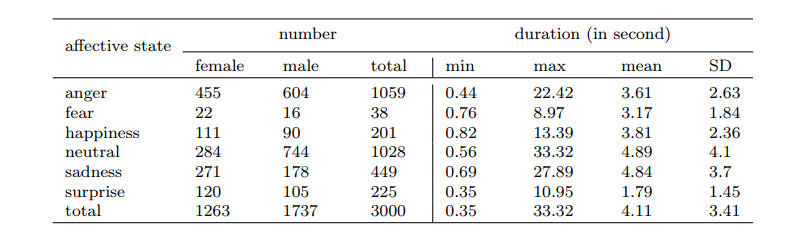

In [219]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/shEMO/*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[3]
        if emotion=='S':
          e='sandness'
        if emotion=='A':
          e='anger'
        if emotion=='H':
          e='happiness'
        if emotion=='W':
          e='surprise'
        if emotion=='F':
          e='fear'
        if emotion=='N':
            e='Neutral'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [220]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  2.1362305e-04  1.5258789e-04 ... -6.1035156e-05
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00152588  0.00137329  0.00146484 ... -0.0015564  -0.00158691
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00073242 0.00073242 0.00073242 ... 0.00061035 0.00064087 0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[1.8310547e-04 2.7465820e-04 9.1552734e-05 ... 3.0517578e-05 9.1552734e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05  6.1035156e-05 ...  6.1035156e-05
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1057129e-03  2.4414062e-03 -1.5563965e-03 ...  6.1035156e-05
  0.0000000e+00 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.4604492e-04 -7.3242188e-04 -7.3242188e-04 ...  1.5258789e-04
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ... -9.1552734e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00054932  0.00027466  0.0005188  ... -0.00027466 -0.00054932
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05 -9.1552734e-05 ...  6.1035156e-05
 -1.2207031e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[9.1552734e-05 1.8310547e-04 3.0517578e-05 ... 3.3569336e-04 3.0517578e-04
 3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  9.1552734e-05
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05 -9.1552734e-05 ...  3.3569336e-04
 -1.5258789e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  6.1035156e-05 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -1.2207031e-04 ...  1.5258789e-04
  1.2207031e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -8.2397461e-04
 -9.1552734e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.0015564
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: F

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00015259  0.00036621  0.00012207 ...  0.00024414 -0.00015259
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00042725 -0.00042725 -0.00039673 ... -0.00048828 -0.00027466
 -0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -9.1552734e-05  1.8310547e-04 ... -6.1035156e-04
 -2.7465820e-04 -6.1035156e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pas

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0822754e-03  2.4719238e-03  2.7160645e-03 ...  0.0000000e+00
  1.5258789e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00  1.5258789e-04 ... -9.1552734e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  3.0517578e-05 ... -1.2207031e-03
 -1.1901855e-03 -1.3122559e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00015259 0.00012207 0.00012207 ... 0.00323486 0.00317383 0.00323486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  2.1362305e-04  3.0517578e-05 ... -9.1552734e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05  3.0517578e-05 ... -3.0517578e-04
 -9.1552734e-05 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  6.1035156e-05 ... -1.2207031e-04
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  1.5258789e-04 ...  1.5258789e-04
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05  0.0000000e+00 ... -1.5258789e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00082397 -0.00064087 -0.00036621 ... -0.00015259  0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -6.1035156e-05 ...  1.2207031e-04
  1.8310547e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05  1.2207031e-04 ... -1.8310547e-04
 -1.8310547e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  6.1035156e-05 -6.1035156e-05 ...  3.0517578e-04
  5.1879883e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  0.0000000e+00  1.2207031e-04 ...  3.0517578e-05
  1.8310547e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  9.1552734e-05  9.1552734e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -3.0517578e-05 ...  1.2207031e-04
 -6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  2.1362305e-04  6.1035156e-05 ...  3.0517578e-05
 -1.2207031e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00064087  0.00015259  0.00076294 ... -0.00082397 -0.00082397
 -0.00112915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00143433  0.00128174  0.00149536 ... -0.00042725 -0.00030518
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pas

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.4414062e-04  6.1035156e-05 ... -1.1901855e-03
 -8.5449219e-04 -6.4086914e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ... -4.1503906e-03
 -4.2114258e-03 -4.1809082e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  0.0000000e+00  6.1035156e-05 ...  9.1552734e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -1.5258789e-04 -9.1552734e-05 ... -1.0681152e-03
 -1.3427734e-03 -9.7656250e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.5776367e-04  4.8828125e-04  5.1879883e-04 ... -6.1035156e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  1.5258789e-04  0.0000000e+00 ...  9.1552734e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  2.4414062e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  6.1035156e-05 -3.0517578e-05 ... -1.4953613e-03
 -1.6784668e-03 -1.4953613e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  3.0517578e-05 -2.4414062e-04 ...  2.7465820e-04
  3.3569336e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -1.8310547e-04 -3.0517578e-05 ... -8.2397461e-04
 -9.4604492e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  3.0517578e-05 ...  9.1552734e-05
 -1.5258789e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8310547e-04  6.1035156e-05 -6.1035156e-05 ... -6.1035156e-05
  1.5258789e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00018311 -0.00024414 -0.00030518 ...  0.00158691  0.00146484
  0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -6.1035156e-05  1.2207031e-04 ...  9.1552734e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00027466  0.00027466  0.00021362 ... -0.00262451 -0.00286865
 -0.00259399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pas

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.1596680e-03  2.7770996e-03  2.2583008e-03 ...  3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -3.0517578e-05 ...  1.2207031e-04
  6.1035156e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00048828 0.00067139 0.00054932 ... 0.00015259 0.00012207 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  0.0000000e+00  3.0517578e-05 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[2.4414062e-04 3.3569336e-04 3.3569336e-04 ... 6.1035156e-05 0.0000000e+00
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  9.1552734e-05 ...  1.2207031e-04
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  6.1035156e-05 ...  9.1552734e-05
  6.7138672e-04  8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.4953613e-03 -1.4038086e-03 -1.2207031e-03 ...  3.0517578e-05
  1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00030518 -0.00021362 -0.00036621 ...  0.00146484  0.00161743
  0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  1.5258789e-04  3.0517578e-05 ... -1.5258789e-04
  3.0517578e-05 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00030518 -0.00030518 -0.00021362 ...  0.00308228  0.00308228
  0.00305176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00073242  0.00097656 -0.00131226 ...  0.00073242  0.00012207
  0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pas

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  6.1035156e-05  1.5258789e-04 ...  9.1552734e-05
  3.0517578e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-4.5776367e-04 -3.6621094e-04 -3.6621094e-04 ... -3.0517578e-05
 -3.3569336e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00 -1.2207031e-04 ... -2.1362305e-04
 -1.2207031e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  6.1035156e-05 -1.2207031e-04 ...  6.7138672e-04
  4.2724609e-04  8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -1.5258789e-04  1.5258789e-04 ...  6.1035156e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -2.4414062e-04 -1.5258789e-04 ...  1.2207031e-04
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -3.0517578e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  0.0000000e+00 -9.1552734e-05 ...  0.0000000e+00
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -6.1035156e-05  1.2207031e-04 ... -7.3242188e-04
 -7.9345703e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  1.2207031e-04 -9.1552734e-05 ...  3.0517578e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04  3.0517578e-05 ...  1.2207031e-04
 -2.1362305e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[1.5258789e-04 3.3569336e-04 1.2207031e-04 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05  1.2207031e-04 ...  3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8310547e-04  1.2207031e-04 -3.6621094e-04 ... -6.1035156e-05
  1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04 -6.1035156e-05  6.1035156e-05 ... -9.1552734e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  9.1552734e-05 ... -1.0375977e-03
 -1.2512207e-03 -1.2512207e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.          0.         ... -0.00021362  0.00021362
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  1.2207031e-04  1.5258789e-04 ...  0.0000000e+00
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00048828  0.00030518 ... -0.0005188  -0.00079346
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00177002 0.00167847 0.00167847 ... 0.00033569 0.00015259 0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.2724609e-04  4.2724609e-04  3.3569336e-04 ... -6.1035156e-05
 -2.1362305e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ...  3.0517578e-05
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  9.1552734e-05 -6.1035156e-05 ...  3.0517578e-05
  1.2207031e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -3.0517578e-05
  3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05  6.1035156e-05 ...  3.0517578e-05
  1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ...  2.7465820e-04
  5.1879883e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.0007019  -0.0007019  -0.00076294 ...  0.00018311 -0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 1.5258789e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: Future

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  3.0517578e-05 ... -2.1057129e-03
 -2.1057129e-03 -2.0751953e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04  6.1035156e-05 ... -2.4108887e-03
 -1.9836426e-03 -1.3427734e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05  3.0517578e-05 ... -2.4414062e-04
 -2.1362305e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  9.1552734e-05 -9.1552734e-05 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  6.1035156e-05 ... -6.1035156e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  0.0000000e+00 ...  3.0517578e-05
 -1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[5.1879883e-04 5.7983398e-04 4.5776367e-04 ... 9.1552734e-05 1.8310547e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
  6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  9.1552734e-05 ...  2.7465820e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  6.1035156e-05 -1.2207031e-04 ... -1.5258789e-04
 -2.7465820e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ...  2.2888184e-03
  2.2277832e-03  2.2583008e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  3.0517578e-05 ...  9.1552734e-05
 -1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -6.1035156e-05 ...  1.8310547e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[9.1552734e-05 1.2207031e-04 9.1552734e-05 ... 2.4414062e-04 1.2207031e-04
 3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.1879883e-04  6.4086914e-04  6.1035156e-04 ... -3.0517578e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-04  4.2724609e-04  7.3242188e-04 ... -9.1552734e-05
  1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00054932 -0.00064087 -0.00064087 ... -0.02835083 -0.02774048
 -0.02774048] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-04 -2.1362305e-04 -6.1035156e-05 ...  0.0000000e+00
 -3.0517578e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  2.1362305e-04  2.1362305e-04 ... -3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -1.2207031e-04  9.1552734e-05 ... -3.0517578e-04
  3.6621094e-04  7.9345703e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00036621 0.00042725 0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -1.5258789e-04 -1.2207031e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00192261  0.00128174  0.00057983 ... -0.00085449 -0.0010376
 -0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ... -1.2207031e-04
  9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  6.1035156e-05 ... -2.7465820e-04
 -2.4414062e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: F

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -1.5258789e-04 -9.1552734e-05 ...  2.1362305e-04
  2.1362305e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-04 -9.1552734e-05 -2.4414062e-04 ...  6.7138672e-04
  7.6293945e-04  6.1035156e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  3.0517578e-05  6.1035156e-05 ... -6.1035156e-04
 -6.7138672e-04 -7.6293945e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00045776 -0.00033569 -0.00064087 ... -0.0010376  -0.00064087
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.00012207  0.         ... -0.00012207 -0.00018311
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pas

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00024414 -0.00039673 -0.00042725 ... -0.00094604 -0.00082397
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
  9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-04 -2.7465820e-04 -2.1362305e-04 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -3.0517578e-05 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  9.1552734e-05 -3.0517578e-05 ... -9.1552734e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -6.1035156e-05  3.0517578e-05 ... -3.0517578e-05
  3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  1.5258789e-04 ...  6.4086914e-04
  5.7983398e-04  7.0190430e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05  6.1035156e-05 ... -2.4414062e-04
 -2.7465820e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00054932 -0.00057983 -0.00061035 ...  0.00027466  0.00030518
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00021362  0.         ... -0.00024414  0.
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  9.1552734e-05 -6.1035156e-05 ... -1.2207031e-04
 -2.4414062e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00021362  0.00015259 ...  0.         -0.00027466
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00015259  0.00045776  0.00030518 ... -0.00033569 -0.00015259
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -1.2207031e-04 ...  1.2207031e-04
 -2.1362305e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.5258789e-04 ...  3.1433105e-03
  2.4108887e-03  1.6479492e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8005371e-03 -1.9226074e-03 -1.5563965e-03 ... -9.1552734e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05  9.1552734e-05 ... -6.1035156e-05
  6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00042725 -0.00067139 -0.0005188  ... -0.00027466 -0.00021362
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -2.4414062e-04
 -3.0517578e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00012207 0.00015259 0.00015259 ... 0.00061035 0.00054932 0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00091553  0.0012207   0.00085449 ...  0.00021362 -0.00018311
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05  6.1035156e-05 ... -3.0517578e-05
  6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.4414062e-04 -3.0517578e-04 -1.5258789e-04 ...  1.5258789e-04
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00033569  0.00048828  0.00027466 ... -0.00021362  0.00027466
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05 -1.5258789e-04 ...  3.0517578e-03
  2.9907227e-03  3.0517578e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[2.1362305e-04 2.1362305e-04 9.1552734e-05 ... 2.1362305e-04 6.1035156e-05
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: Future

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -1.5258789e-04  1.8310547e-04 ...  6.1035156e-05
 -6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -1.8310547e-04  1.2207031e-04 ... -6.1035156e-05
  1.8310547e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -1.8310547e-04  1.2207031e-04 ...  6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
  9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ...  7.3242188e-04
  5.4931641e-04  5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00585938 -0.00518799 -0.00518799 ...  0.00039673  0.00039673
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  9.1552734e-05  1.8310547e-04 ... -9.1552734e-05
  2.1362305e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -2.1362305e-04 -1.2207031e-04 ...  1.2207031e-04
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ...  3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
 -6.1035156e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  9.1552734e-05 ... -6.1035156e-05
  1.5258789e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -9.1552734e-05  6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -9.1552734e-05  9.1552734e-05 ...  0.0000000e+00
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.7465820e-04 -2.1362305e-04 -2.7465820e-04 ...  1.5258789e-04
 -2.4414062e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -9.1552734e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.9672852e-04 -1.0681152e-03 -6.4086914e-04 ...  0.0000000e+00
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  0.0000000e+00 -1.2207031e-04 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.1879883e-04 -7.3242188e-04 -3.9672852e-04 ... -6.1035156e-05
  4.5776367e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.5258789e-04  1.5258789e-04 ... -9.1552734e-05
  1.5258789e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-7.3242188e-04 -6.1035156e-04 -7.9345703e-04 ...  6.1035156e-05
 -9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.4931641e-04  2.1362305e-04  4.5776367e-04 ...  3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  1.2207031e-04 -1.2207031e-04 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00027466  0.00030518 -0.00027466 ... -0.00100708 -0.00079346
 -0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.1879883e-04 -3.3569336e-04  9.1552734e-05 ... -2.4414062e-04
  1.8310547e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00033569 -0.00015259 -0.00045776 ... -0.00015259  0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  0.0000000e+00 -6.1035156e-05 ... -1.4953613e-03
 -9.7656250e-04 -1.4953613e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00045776  0.00039673  0.00027466 ...  0.00021362 -0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04 -6.1035156e-05  2.7465820e-04 ...  1.1596680e-03
  1.2207031e-03  1.3122559e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -3.0517578e-05 ... -7.3242188e-04
 -1.0375977e-03 -1.2207031e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  0.0000000e+00  3.0517578e-05 ... -3.0517578e-05
  6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-4.8828125e-04 -4.5776367e-04 -4.5776367e-04 ...  6.1035156e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -1.5258789e-04 -1.5258789e-04 ...  0.0000000e+00
  9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.6784668e-03 -1.4648438e-03 -1.4953613e-03 ... -6.1035156e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.4931641e-04  3.9672852e-04  4.2724609e-04 ...  0.0000000e+00
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00024414 0.00027466 0.00024414 ... 0.01004028 0.0100708  0.01022339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -9.1552734e-05 -3.0517578e-05 ...  3.0517578e-05
 -9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.4931641e-04 -2.4414062e-04 -4.8828125e-04 ... -9.1552734e-05
  9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  0.0000000e+00 ... -6.4086914e-04
 -1.0070801e-03 -1.0681152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04  1.8310547e-04  6.1035156e-05 ... -9.1552734e-05
 -9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.4086914e-04  2.7465820e-04 -9.1552734e-05 ... -6.1035156e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00033569 -0.00012207 -0.00033569 ...  0.00024414 -0.00024414
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  9.1552734e-05 -6.1035156e-05 ...  2.1972656e-03
  2.7160645e-03  2.1057129e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.1879883e-04 -2.7465820e-04 -4.2724609e-04 ...  9.1552734e-05
  1.2207031e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
  9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00192261 0.00210571 0.00259399 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 2.4414062e-04 1.8310547e-04
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05  0.0000000e+00 ...  2.7465820e-04
  9.1552734e-05  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00390625 -0.00384521 -0.00372314 ...  0.00094604  0.00094604
  0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00421143 0.00418091 0.00408936 ... 0.00064087 0.00036621 0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00027466 -0.00036621 -0.00027466 ...  0.00210571  0.00332642
  0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00012207 -0.00018311 ... -0.00167847 -0.00204468
 -0.00186157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04  4.5776367e-04 -6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pas

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00 -9.1552734e-05 ...  6.1035156e-04
  6.1035156e-04  6.4086914e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  6.1035156e-05 ...  0.0000000e+00
  1.5258789e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  9.1552734e-05
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  9.1552734e-05 -1.2207031e-04 ... -1.2207031e-04
  1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00057983  0.00073242 ... -0.00036621 -0.00033569
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04  1.2207031e-04  2.1362305e-04 ... -6.1035156e-05
  6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.4931641e-03 -5.5847168e-03 -5.4321289e-03 ... -1.2207031e-04
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8005371e-03  2.1362305e-03  2.1667480e-03 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  3.0517578e-05 ... -1.0375977e-03
 -7.9345703e-04 -6.4086914e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.2207031e-04  9.1552734e-05 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.8500977e-04  8.5449219e-04  7.9345703e-04 ... -9.1552734e-05
  6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -1.2207031e-04 -1.5258789e-04 ...  3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -2.4414062e-04 -3.9672852e-04 ... -3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05 -1.5258789e-04 ... -1.3427734e-03
 -1.3122559e-03 -1.3122559e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  9.1552734e-05 -2.7465820e-04 ...  3.0517578e-05
 -9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
  1.2207031e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
 -6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.9672852e-04 -2.7465820e-04 -3.9672852e-04 ... -6.1035156e-05
  9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  2.1362305e-04  0.0000000e+00 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00054932 -0.00067139 -0.00054932 ...  0.00012207 -0.00012207
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00  3.0517578e-05 ... -1.2207031e-04
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ...  1.8310547e-04
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00027466 -0.00018311 -0.00024414 ... -0.00039673 -0.00039673
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  1.5258789e-04  6.1035156e-05 ...  0.0000000e+00
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-4.8828125e-04 -2.7465820e-04 -5.1879883e-04 ... -3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  3.0517578e-05 ...  1.2207031e-04
 -1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00045776 -0.0005188  -0.0005188  ...  0.00042725  0.00033569
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  0.0000000e+00 ...  6.1035156e-05
 -2.7465820e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00 -1.8310547e-04 ... -6.1035156e-05
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -9.1552734e-05 ... -9.1552734e-05
  6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00247192  0.00186157  0.00094604 ... -0.00012207 -0.00027466
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05 -1.2207031e-04 ... -6.1035156e-05
 -3.0517578e-05  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.4604492e-04  1.7700195e-03  1.9836426e-03 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.7465820e-04 -6.1035156e-05 -1.8310547e-04 ...  1.8310547e-04
  1.8310547e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00039673 -0.00042725 -0.00054932 ... -0.00686646 -0.00595093
 -0.00289917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00177002 -0.0017395  -0.00125122 ...  0.00894165  0.00805664
  0.00436401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00030518 0.00030518 0.00033569 ... 0.00012207 0.00024414 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00015259 -0.00097

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.7138672e-04  5.1879883e-04  3.9672852e-04 ... -6.1035156e-05
 -1.8310547e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00091553  0.0007019   0.00097656 ... -0.00030518  0.
 -0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -9.1552734e-05 ... -2.1362305e-04
 -3.6621094e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWa

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-03 -5.1879883e-04  1.5258789e-04 ...  0.0000000e+00
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  1.8310547e-04  3.0517578e-05 ... -1.2207031e-04
 -4.2724609e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00018311  0.00012207 -0.00018311 ... -0.00082397 -0.00082397
 -0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -6.1035156e-05 ...  2.1362305e-04
 -3.0517578e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ... -9.1552734e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00015259  0.00018311 ... -0.00067139 -0.0007019
 -0.00064087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: F

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[1.2207031e-04 2.7465820e-04 2.1362305e-04 ... 2.1362305e-04 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00015259 0.00012207 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00137329 0.00112915 0.00112915 ... 0.00067139 0.00100708 0.00085449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.5776367e-04 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-4.5776367e-04 -4.8828125e-04 -3.3569336e-04 ... -9.1552734e-05
 -2.4414062e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  3.0517578e-05  0.0000000e+00 ...  7.0190430e-04
  4.2724609e-04  5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00146484 -0.00170898 -0.00146484 ... -0.00299072 -0.00289917
 -0.00289917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: 

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.2207031e-04  9.1552734e-05 ... -9.1552734e-05
  9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  3.0517578e-05 ... -1.2207031e-04
 -2.7465820e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  6.1035156e-05 -6.1035156e-05 ... -3.0517578e-05
  6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -3.6621094e-04
 -3.0517578e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05  6.1035156e-05 ... -2.7465820e-04
 -2.7465820e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -2.4414062e-04  6.1035156e-05 ...  7.9345703e-04
 -6.1035156e-05  7.6293945e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 3.3569336e-04 7.9345703e-04
 7.9345703e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 7.3242188e-04  3.3569336e-04  3.6621094e-04 ... -6.1035156e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-7.0190430e-04 -5.1879883e-04 -8.8500977e-04 ... -6.1035156e-05
 -1.8310547e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-04 -9.1552734e-05 -1.2207031e-04 ...  2.1362305e-04
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -9.1552734e-05 ...  1.4038086e-03
  1.4953613e-03  1.0070801e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05  6.1035156e-05 ...  1.2512207e-03
  1.4953613e-03  1.4953613e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00128174 0.0007019  0.00030518 ... 0.00061035 0.00061035 0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-7.0190430e-04 -7.3242188e-04 -2.7465820e-04 ...  6.1035156e-05
  1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -3.0517578e-05  0.0000000e+00 ... -1.5258789e-04
 -2.1362305e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8310547e-04 -6.1035156e-05 -1.5258789e-04 ...  3.0517578e-04
  1.8310547e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  6.1035156e-05  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -9.1552734e-05  9.1552734e-05 ...  3.0517578e-05
  2.4414062e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04  3.0517578e-05  3.9672852e-04 ...  1.2207031e-04
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  1.2207031e-04
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  2.4414062e-04  1.8310547e-04 ...  3.0517578e-05
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -6.1035156e-05 ...  1.2207031e-04
  0.0000000e+00  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 5.4931641e-04 7.9345703e-04
 5.1879883e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00106812 -0.00109863 -0.00106812 ... -0.00018311 -0.00015259
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00033569 0.00024414 0.00024414 ... 0.00030518 0.00021362 0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.05175

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-04 -4.2724609e-04 -4.8828125e-04 ... -3.0517578e-05
  3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -9.1552734e-05  9.1552734e-05 ...  1.2207031e-04
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.4038086e-03  1.3122559e-03  1.4038086e-03 ...  1.2207031e-04
 -1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.6669922e-03  8.5144043e-03  8.5754395e-03 ... -6.1035156e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -1.2207031e-04 -6.1035156e-05 ... -3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05  3.0517578e-05 ...  3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-

<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.9672852e-04  2.7465820e-04  3.0517578e-04 ... -3.0517578e-05
  3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00222778 0.0027771  0.00338745 ... 0.00061035 0.00082397 0.00064087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  1.2207031e-04 -1.5258789e-04 ... -2.9296875e-03
 -2.6855469e-03 -2.7465820e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-213-9dabec9f0adb>:14: FutureW

In [221]:
x_train.shape

(2400, 182)

In [222]:
y_test

['happiness',
 'sandness',
 'Neutral',
 'surprise',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'happiness',
 'anger',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'sandness',
 'Neutral',
 'Neutral',
 'Neutral',
 'anger',
 'Neutral',
 'sandness',
 'happiness',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'sandness',
 'Neutral',
 'anger',
 'Neutral',
 'happiness',
 'anger',
 'Neutral',
 'anger',
 'anger',
 'anger',
 'sandness',
 'anger',
 'happiness',
 'sandness',
 'anger',
 'sandness',
 'Neutral',
 'anger',
 'Neutral',
 'sandness',
 'Neutral',
 'anger',
 'surprise',
 'happiness',
 'anger',
 'Neutral',
 'Neutral',
 'anger',
 'anger',
 'sandness',
 'sandness',
 'Neutral',
 'Neutral',
 'Neutral',
 'anger',
 'anger',
 'Neutral',
 'Neutral',
 'anger',
 'anger',
 'Neutral',
 'anger',
 'Neutral',
 'surprise',
 'Neutral',
 'anger',
 'fear',
 'anger',
 'sandness',
 'anger',
 'anger',
 'sandness',
 'anger',
 'anger',
 'anger',
 'Neutral',
 'Neutral',
 'anger',
 'sandness

In [223]:
final_labels  = ['Neutral',
'anger',
'fear',
'happiness' ,
'sadness',
'surprise']

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

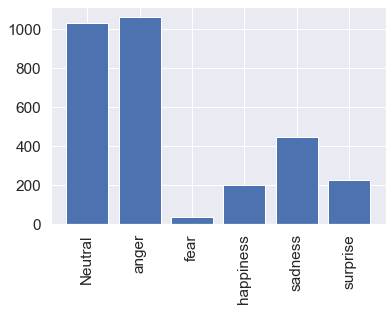

In [225]:
import matplotlib.pyplot  as plt
plt.bar(final_labels,df.groupby('emo').size())
plt.xticks(rotation=90)

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [227]:
import time
start = time.time()
model=MLPClassifier(alpha=0.0005, batch_size=32, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate='constant',activation='logistic',solver='adam',max_iter=600)
model.fit(x_train,y_train)
end = time.time()
train_time_total=end-start
print(train_time_total)

27.98654317855835


In [228]:
start = time.time()
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
end = time.time()
test_time_total=end-start
print(test_time_total)

Logistic-Accuracy: 74.50%
              precision    recall  f1-score   support

     Neutral       0.73      0.85      0.79       201
       anger       0.86      0.85      0.86       222
        fear       0.25      0.17      0.20         6
   happiness       0.45      0.35      0.39        37
    sandness       0.72      0.58      0.64        90
    surprise       0.49      0.48      0.48        44

    accuracy                           0.74       600
   macro avg       0.58      0.55      0.56       600
weighted avg       0.74      0.74      0.74       600

0.024967193603515625


In [229]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,normalize='true')
conf_matrix= pd.DataFrame(cm, index = final_labels, columns=final_labels)
conf_matrix

,Neutral,anger,fear,happiness,sadness,surprise
Neutral,0.850746,0.059701,0.004975,0.009950,0.029851,0.044776
anger,0.067568,0.851351,0.000000,0.031532,0.027027,0.022523
fear,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000
happiness,0.405405,0.108108,0.000000,0.351351,0.081081,0.054054
sadness,0.211111,0.077778,0.000000,0.066667,0.577778,0.066667
surprise,0.227273,0.136364,0.045455,0.022727,0.090909,0.477273


In [230]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[171  12   1   2   6   9]
 [ 15 189   0   7   6   5]
 [  3   1   1   0   1   0]
 [ 15   4   0  13   3   2]
 [ 19   7   0   6  52   6]
 [ 10   6   2   1   4  21]]


In [231]:
cm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([85.07462687, 85.13513514, 16.66666667, 35.13513514, 57.77777778,
       47.72727273])

Text(0.5, 1.0, 'accuracy of each class')

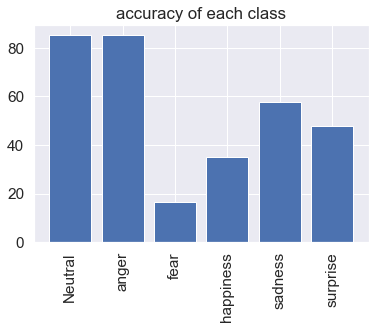

In [232]:
plt.bar(final_labels,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

In [233]:
df = pd.DataFrame(np.array(y_test), columns = ['actual'])
df['predicted'] = np.array(y_pred)
df
    

,actual,predicted
0,happiness,surprise
1,sandness,anger
2,Neutral,Neutral
3,surprise,surprise
4,Neutral,Neutral
...,...,...
595,Neutral,Neutral
596,surprise,fear
597,sandness,sandness
598,Neutral,Neutral


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Neutral'),
  Text(0, 1.5, 'anger'),
  Text(0, 2.5, 'fear'),
  Text(0, 3.5, 'happiness'),
  Text(0, 4.5, 'sadness'),
  Text(0, 5.5, 'surprise')])

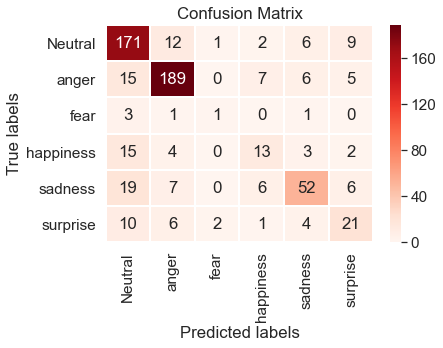

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(final_labels); ax.yaxis.set_ticklabels(final_labels);
plt.xticks(rotation=90)
plt.yticks(rotation=0)

## ANN 


In [105]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)

    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

    return mfccs

In [106]:
root_dir = "D:/AAA_video_course/Programming/A_main/zzzdatasets/shEMO"

audio_data = [] ###stores the mfcc data
audio_labels = [] ###stores the labels
for subdirs, dirs, files in os.walk(root_dir):
    for file in files:
        y, sr = librosa.load(os.path.join(subdirs,file))
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
        audio_data.append(mfccs)
        emotion=file[3]
        if emotion=='S':
          e='sandness'
        if emotion=='A':
          e='anger'
        if emotion=='H':
          e='happiness'
        if emotion=='W':
          e='surprise'
        if emotion=='F':
          e='fear'
        if emotion=='N':
          e='neutral'
        audio_labels.append(e)

In [107]:
X = np.asarray(audio_data)
y = np.asarray(audio_labels)

In [109]:
X.shape, y.shape

((3000, 40), (3000,))

In [111]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/thesis_codes/7_shEMO_PER'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [165]:
# Loading saved models
X = joblib.load('D:/thesis_codes/7_shEMO_PER/X.joblib')
y = joblib.load('D:/thesis_codes/7_shEMO_PER/y.joblib')

In [166]:
UNIQUE_LABELS = np.unique(y)
UNIQUE_LABELS

array(['anger', 'fear', 'happiness', 'neutral', 'sandness', 'surprise'],
      dtype='<U9')

## D-TREE

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [117]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
predictions = dtree.predict(X_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64       335
        fear       0.06      0.08      0.07        12
   happiness       0.23      0.16      0.19        73
     neutral       0.64      0.62      0.63       349
    sandness       0.36      0.40      0.38       146
    surprise       0.24      0.23      0.23        75

    accuracy                           0.53       990
   macro avg       0.36      0.36      0.36       990
weighted avg       0.53      0.53      0.53       990



In [125]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, predictions)
cfm

array([[219,  11,  15,  47,  29,  14],
       [  2,   1,   1,   3,   2,   3],
       [ 26,   0,  12,  14,  13,   8],
       [ 48,   2,  18, 218,  48,  15],
       [ 30,   3,   3,  38,  59,  13],
       [ 21,   1,   3,  19,  14,  17]], dtype=int64)

<AxesSubplot:>

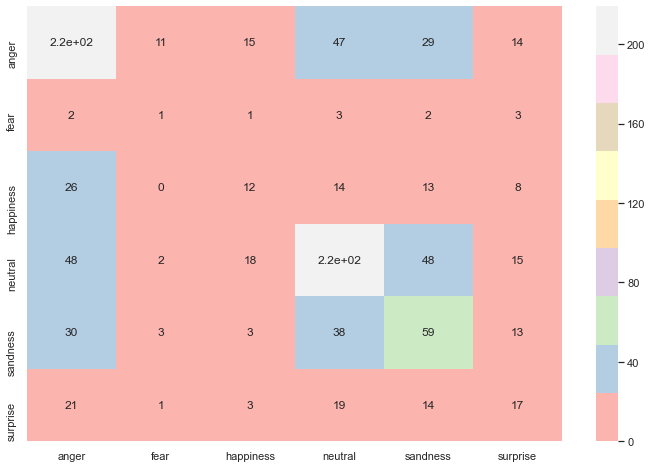

In [140]:
import seaborn as sns
df_cm = pd.DataFrame(cfm, index = [i for i in UNIQUE_LABELS],
                  columns = [i for i in UNIQUE_LABELS])
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, cmap='Pastel1')

In [141]:
cm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([65.37313433,  8.33333333, 16.43835616, 62.46418338, 40.4109589 ,
       22.66666667])

Text(0.5, 1.0, 'accuracy of each class')

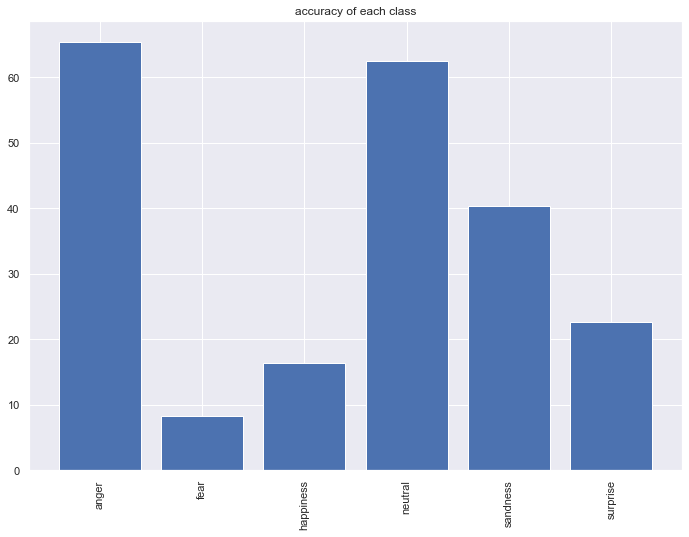

In [143]:
plt.bar(UNIQUE_LABELS,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

# Neural network

In [202]:
X = joblib.load('D:/thesis_codes/7_shEMO_PER/X.joblib')
y = joblib.load('D:/thesis_codes/7_shEMO_PER/y.joblib')

In [203]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [205]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [206]:
x_traincnn.shape, x_testcnn.shape

((2010, 40, 1), (990, 40, 1))

In [207]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [208]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 40, 128)           768       
                                                                 
 activation_39 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_26 (Dropout)        (None, 40, 128)           0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 5, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_27 (Conv1D)          (None, 5, 128)            82048     
                                                                 
 activation_40 (Activation)  (None, 5, 128)            0         
                                                     

In [209]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [210]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=8, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
252/252 [==============================] - 3s 10ms/step - loss: 2.8460 - accuracy: 0.3647 - val_loss: 1.5510 - val_accuracy: 0.5263
Epoch 2/100
252/252 [==============================] - 2s 10ms/step - loss: 2.0465 - accuracy: 0.4677 - val_loss: 1.9920 - val_accuracy: 0.3465
Epoch 3/100
252/252 [==============================] - 3s 10ms/step - loss: 1.7354 - accuracy: 0.5189 - val_loss: 1.2595 - val_accuracy: 0.5879
Epoch 4/100
252/252 [==============================] - 3s 10ms/step - loss: 1.5565 - accuracy: 0.5418 - val_loss: 1.2191 - val_accuracy: 0.6030
Epoch 5/100
252/252 [==============================] - 3s 10ms/step - loss: 1.3981 - accuracy: 0.5716 - val_loss: 1.1734 - val_accuracy: 0.5818
Epoch 6/100
252/252 [==============================] - 3s 10ms/step - loss: 1.3051 - accuracy: 0.5900 - val_loss: 1.0686 - val_accuracy: 0.6364
Epoch 7/100
252/252 [==============================] - 3s 10ms/step - loss: 1.2416 - accuracy: 0.6045 - val_loss: 1.0620 - val_accuracy:

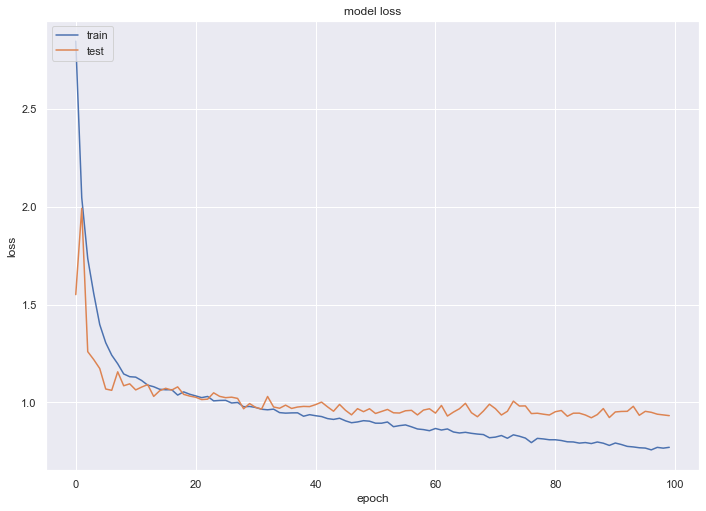

In [211]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

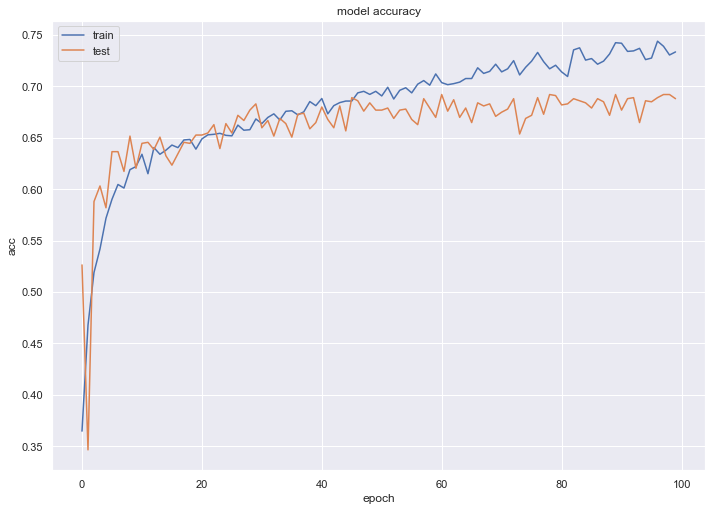

In [214]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [222]:
predictions = model.predict(x_testcnn)
predictions = np.argmax(predictions, axis = 1)
predictions

array([3, 0, 3, 2, 3, 5, 0, 0, 3, 3, 0, 4, 4, 3, 0, 3, 5, 0, 4, 3, 0, 0,
       3, 3, 0, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 4, 0, 3, 0, 5, 0, 3, 3, 5, 3, 4, 2, 5, 0, 5, 3, 4, 4, 4, 0,
       0, 3, 3, 0, 0, 0, 3, 5, 0, 0, 3, 0, 3, 0, 3, 3, 4, 3, 3, 5, 0, 0,
       3, 0, 0, 0, 4, 0, 3, 4, 3, 3, 0, 0, 3, 0, 3, 3, 0, 4, 3, 0, 4, 0,
       3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 4, 0, 4, 0, 3,
       3, 3, 4, 0, 3, 3, 2, 0, 3, 3, 3, 0, 3, 4, 3, 0, 3, 4, 3, 3, 3, 3,
       3, 0, 3, 4, 3, 3, 0, 0, 2, 3, 3, 3, 5, 3, 3, 0, 4, 0, 3, 0, 3, 2,
       0, 3, 3, 3, 3, 5, 3, 4, 2, 0, 3, 3, 3, 0, 4, 3, 3, 0, 0, 0, 0, 3,
       4, 4, 0, 3, 3, 0, 3, 0, 0, 0, 3, 5, 0, 0, 3, 0, 4, 0, 0, 5, 3, 0,
       0, 3, 3, 3, 0, 0, 3, 0, 0, 4, 3, 3, 3, 2, 3, 5, 3, 0, 3, 3, 3, 5,
       3, 0, 0, 3, 4, 0, 5, 3, 2, 3, 0, 5, 0, 4, 3, 0, 0, 0, 3, 0, 3, 4,
       0, 4, 3, 2, 3, 0, 3, 2, 4, 0, 4, 4, 0, 5, 0, 0, 3, 3, 0, 4, 0, 0,
       0, 3, 0, 0, 3, 0, 4, 4, 3, 3, 4, 3, 3, 0, 0,

In [223]:
y_test

array([3, 0, 3, 2, 2, 5, 0, 0, 4, 1, 3, 4, 4, 3, 3, 0, 2, 0, 2, 3, 4, 0,
       3, 4, 0, 3, 3, 1, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 4, 4, 0,
       4, 3, 4, 0, 3, 5, 3, 0, 3, 4, 5, 3, 0, 0, 5, 0, 5, 3, 4, 4, 4, 3,
       0, 3, 4, 0, 0, 0, 3, 5, 5, 2, 5, 5, 3, 0, 5, 4, 2, 3, 2, 4, 0, 0,
       3, 0, 0, 0, 4, 0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 3, 2, 4, 3, 0, 4, 0,
       2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 3, 5, 5, 0, 4, 0, 3,
       3, 3, 4, 2, 3, 3, 2, 0, 2, 0, 3, 3, 0, 4, 3, 0, 3, 5, 5, 0, 5, 3,
       3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 5, 3, 3, 5, 0, 0, 3, 0, 3, 3,
       0, 3, 3, 3, 4, 5, 5, 3, 2, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 4, 0,
       4, 2, 0, 5, 3, 0, 3, 0, 0, 0, 3, 5, 0, 0, 2, 0, 3, 2, 2, 5, 3, 0,
       0, 5, 2, 3, 0, 4, 4, 0, 0, 4, 3, 4, 4, 2, 2, 0, 3, 0, 0, 4, 3, 3,
       3, 0, 4, 3, 0, 0, 5, 3, 3, 3, 0, 4, 0, 5, 3, 0, 0, 0, 4, 0, 3, 3,
       0, 4, 2, 2, 0, 0, 4, 2, 5, 0, 4, 4, 0, 5, 0, 0, 4, 3, 0, 4, 0, 0,
       2, 3, 0, 0, 3, 2, 4, 1, 3, 3, 2, 3, 4, 4, 2,

In [225]:
new_Ytest = y_test.astype(int)
new_Ytest

array([3, 0, 3, 2, 2, 5, 0, 0, 4, 1, 3, 4, 4, 3, 3, 0, 2, 0, 2, 3, 4, 0,
       3, 4, 0, 3, 3, 1, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 4, 4, 0,
       4, 3, 4, 0, 3, 5, 3, 0, 3, 4, 5, 3, 0, 0, 5, 0, 5, 3, 4, 4, 4, 3,
       0, 3, 4, 0, 0, 0, 3, 5, 5, 2, 5, 5, 3, 0, 5, 4, 2, 3, 2, 4, 0, 0,
       3, 0, 0, 0, 4, 0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 3, 2, 4, 3, 0, 4, 0,
       2, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 3, 5, 5, 0, 4, 0, 3,
       3, 3, 4, 2, 3, 3, 2, 0, 2, 0, 3, 3, 0, 4, 3, 0, 3, 5, 5, 0, 5, 3,
       3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 5, 3, 3, 5, 0, 0, 3, 0, 3, 3,
       0, 3, 3, 3, 4, 5, 5, 3, 2, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 4, 0,
       4, 2, 0, 5, 3, 0, 3, 0, 0, 0, 3, 5, 0, 0, 2, 0, 3, 2, 2, 5, 3, 0,
       0, 5, 2, 3, 0, 4, 4, 0, 0, 4, 3, 4, 4, 2, 2, 0, 3, 0, 0, 4, 3, 3,
       3, 0, 4, 3, 0, 0, 5, 3, 3, 3, 0, 4, 0, 5, 3, 0, 0, 0, 4, 0, 3, 3,
       0, 4, 2, 2, 0, 0, 4, 2, 5, 0, 4, 4, 0, 5, 0, 0, 4, 3, 0, 4, 0, 0,
       2, 3, 0, 0, 3, 2, 4, 1, 3, 3, 2, 3, 4, 4, 2,

In [226]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       335
           1       0.00      0.00      0.00        12
           2       0.44      0.15      0.22        73
           3       0.71      0.85      0.78       349
           4       0.56      0.47      0.51       146
           5       0.46      0.35      0.39        75

    accuracy                           0.69       990
   macro avg       0.49      0.44      0.45       990
weighted avg       0.66      0.69      0.66       990



In [237]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

[[278   1   4  34  10   8]
 [  3   0   0   4   4   1]
 [ 25   0  11  22  12   3]
 [ 18   1   6 298  16  10]
 [ 24   1   2  42  68   9]
 [ 17   0   2  19  11  26]]


In [242]:
cm2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
cm2.diagonal()*100

array([82.98507463,  0.        , 15.06849315, 85.38681948, 46.57534247,
       34.66666667])

Text(0.5, 1.0, 'accuracy of each class')

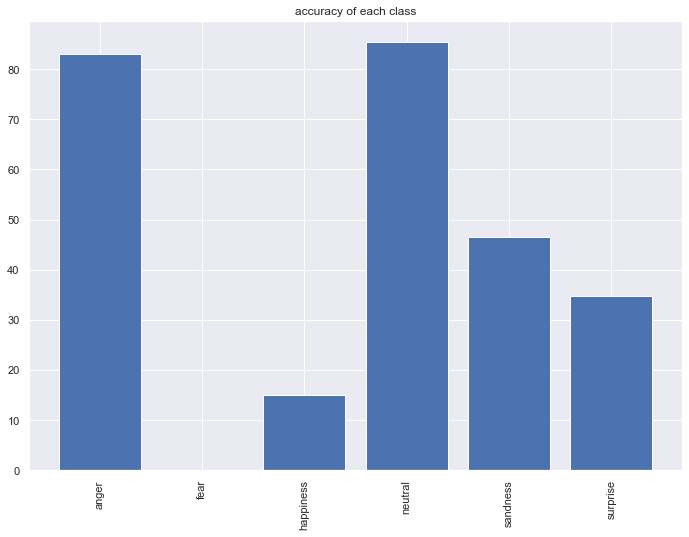

In [243]:
plt.bar(UNIQUE_LABELS,cm2.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

In [266]:
#check accuracy of a class:
# فرمت لازم برای نوشتن تابع دقت برای هر کلاس
df = pd.DataFrame(np.array(y_test), columns = ['actual'])
df['predicted'] = np.array(predictions)
df
   

,actual,predicted
0,3,3
1,0,0
2,3,3
3,2,2
4,2,3
...,...,...
985,0,0
986,4,4
987,3,3
988,3,4


In [355]:
new= []
for i in range(len(df)):
    if df["actual"][i]==0 and df["predicted"][i]==0:
          new.append(df.iloc[i])
new_df  = list(new )
new_df  = pd.DataFrame(new ) 
new_df 

,actual,predicted
1,0,0
6,0,0
7,0,0
17,0,0
21,0,0
...,...,...
963,0,0
967,0,0
974,0,0
976,0,0


In [356]:
total = 0
for i in range(len(df)):
    if df["actual"][i]==0:
        total = total +1
total        

335

In [358]:
accuracy_of_class_0 = len(new_df)/total*100
accuracy_of_class_0 

82.98507462686567

In [315]:
x = ([df["actual"] == df["predicted"]])
x = list(x)
x = pd.DataFrame(x)

t = 0 ; f = 0
for i in range (990):
    if x[i][0] ==True:
        t = t+1
    if x[i][0] ==False:
        f = f+1
print('Number of correct predictions:',t)    
print('Number of false predictions:',f) 

Number of correct predictions: 681
Number of false predictions: 309


In [454]:
def accuracy_for_each_class(*args):
    class_acc = []
    for arg in range(len(args)):
            new = []
            for i in range(len(df)):
                if df["actual"][i]==arg and df["predicted"][i]==arg:
                      new.append(df.iloc[i])
            new_df  = list(new )
            new_df  = pd.DataFrame(new ) 
            total = 0
            for i in range(len(df)):
                if df["actual"][i]==arg:
                    total = total+1
            class_acc.append(len(new)/total*100)
    new_df = pd.DataFrame(class_acc , index = [i for i in UNIQUE_LABELS], 
                          columns = ['accuracy of each class in %'])        
    return new_df    

In [455]:
accuracy_for_each_class(0,1,3,4,5,6)

,accuracy of each class in %
anger,82.985075
fear,0.000000
happiness,15.068493
neutral,85.386819
sandness,46.575342
surprise,34.666667


## OTHER CHANGES MADE

In [ ]:
#_______________________________________________

In [64]:
dataset = pd.DataFrame()
dataset['features'] = audio_data
dataset['labels'] = audio_labels
dataset.to_csv("dataset.csv")


In [68]:
audio_only_data_array = np.array(audio_data)
labels = np.array(audio_labels)
audio_only_data_array.shape

(3000, 40)

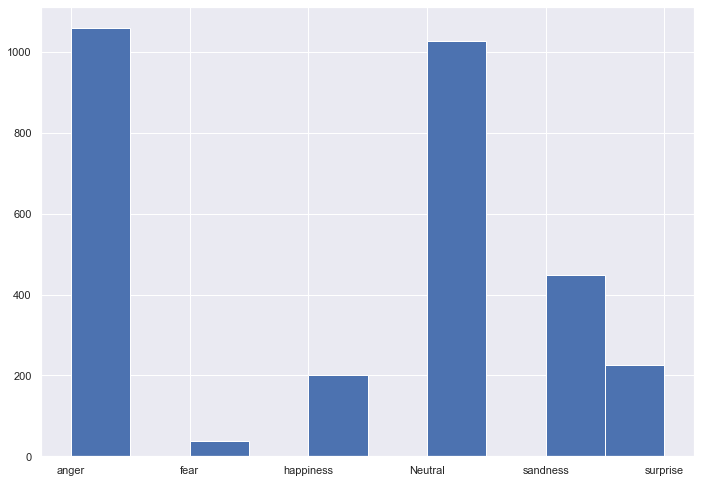

In [69]:
import matplotlib.pyplot as plt
plt.hist(audio_labels)
plt.show()

In [70]:
labels

array(['anger', 'anger', 'anger', ..., 'Neutral', 'Neutral', 'surprise'],
      dtype='<U9')

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
audio_only_labels_array  = le.fit_transform(labels)
audio_only_labels_array

array([1, 1, 1, ..., 0, 0, 5], dtype=int64)

In [72]:
check = pd.DataFrame()
check['labels'] = labels
check['encoded'] = audio_only_labels_array
check

,labels,encoded
0,anger,1
1,anger,1
2,anger,1
3,anger,1
4,anger,1
...,...,...
2995,Neutral,0
2996,Neutral,0
2997,Neutral,0
2998,Neutral,0


In [73]:
labels_categorical = to_categorical(audio_only_labels_array)
#audio_only_data_array.shape
labels_categorical.shape

(3000, 6)

In [74]:
labels_categorical

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [75]:
number_of_samples = audio_only_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
test_samples = int(number_of_samples * 0.2)
number_of_samples

3000

In [76]:
def create_CNN():
    ### CNN model, referred to the model D in the report
    model = Sequential()
    model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(6))
    model.add(Activation('softmax'))
    opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
    

    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

In [77]:
model = create_CNN()
history = model.fit(np.expand_dims(audio_only_data_array,-1), labels_categorical, validation_split=0.3, epochs=50, shuffle=True)

Epoch 1/50


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


66/66 [==============================] - 1s 14ms/step - loss: 3.3281 - accuracy: 0.3414 - val_loss: 1.0358 - val_accuracy: 0.6689
Epoch 2/50
66/66 [==============================] - 1s 9ms/step - loss: 2.5652 - accuracy: 0.4243 - val_loss: 1.0595 - val_accuracy: 0.6711
Epoch 3/50
66/66 [==============================] - 1s 9ms/step - loss: 2.2553 - accuracy: 0.4495 - val_loss: 1.1367 - val_accuracy: 0.6589
Epoch 4/50
66/66 [==============================] - 1s 9ms/step - loss: 2.0909 - accuracy: 0.4681 - val_loss: 1.0542 - val_accuracy: 0.6689
Epoch 5/50
66/66 [==============================] - 1s 9ms/step - loss: 1.9985 - accuracy: 0.4814 - val_loss: 1.1805 - val_accuracy: 0.6589
Epoch 6/50
66/66 [==============================] - 1s 9ms/step - loss: 1.8095 - accuracy: 0.5000 - val_loss: 1.0965 - val_accuracy: 0.6600
Epoch 7/50
66/66 [==============================] - 1s 9ms/step - loss: 1.6412 - accuracy: 0.5300 - val_loss: 1.0150 - val_accuracy: 0.6911
Epoch 8/50
66/66 [============

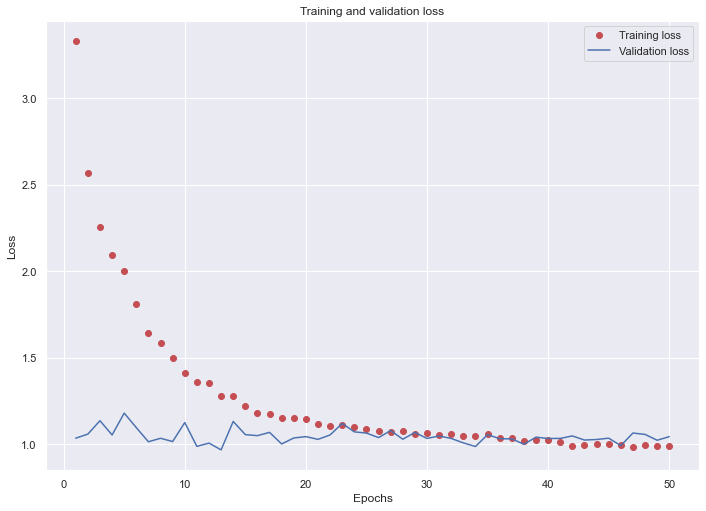

In [78]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

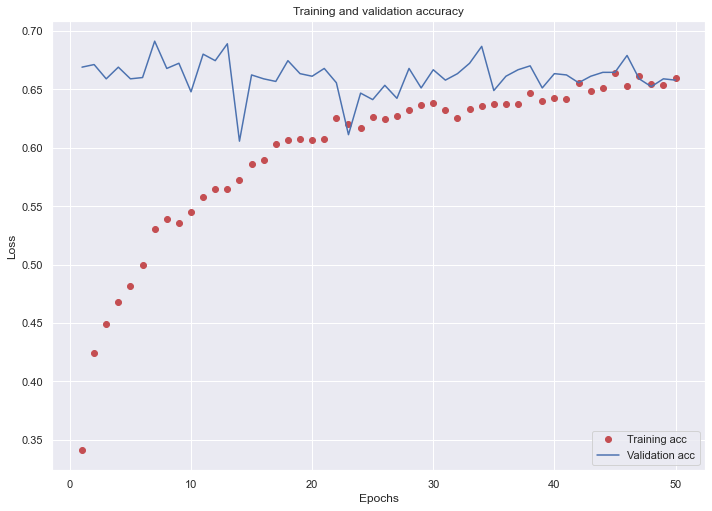

In [79]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [80]:
###  evaluate
model.evaluate(np.expand_dims(audio_only_data_array[training_samples:], -1), labels_categorical[training_samples:])

19/19 [==============================] - 0s 7ms/step - loss: 1.1092 - accuracy: 0.6267


[1.1092238426208496, 0.6266666650772095]

In [ ]:
### prediction ...